# 資料探索與分析(Exploratory Data Analysis, EDA)

# Analyze the data through data visualization using Seaborn
https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

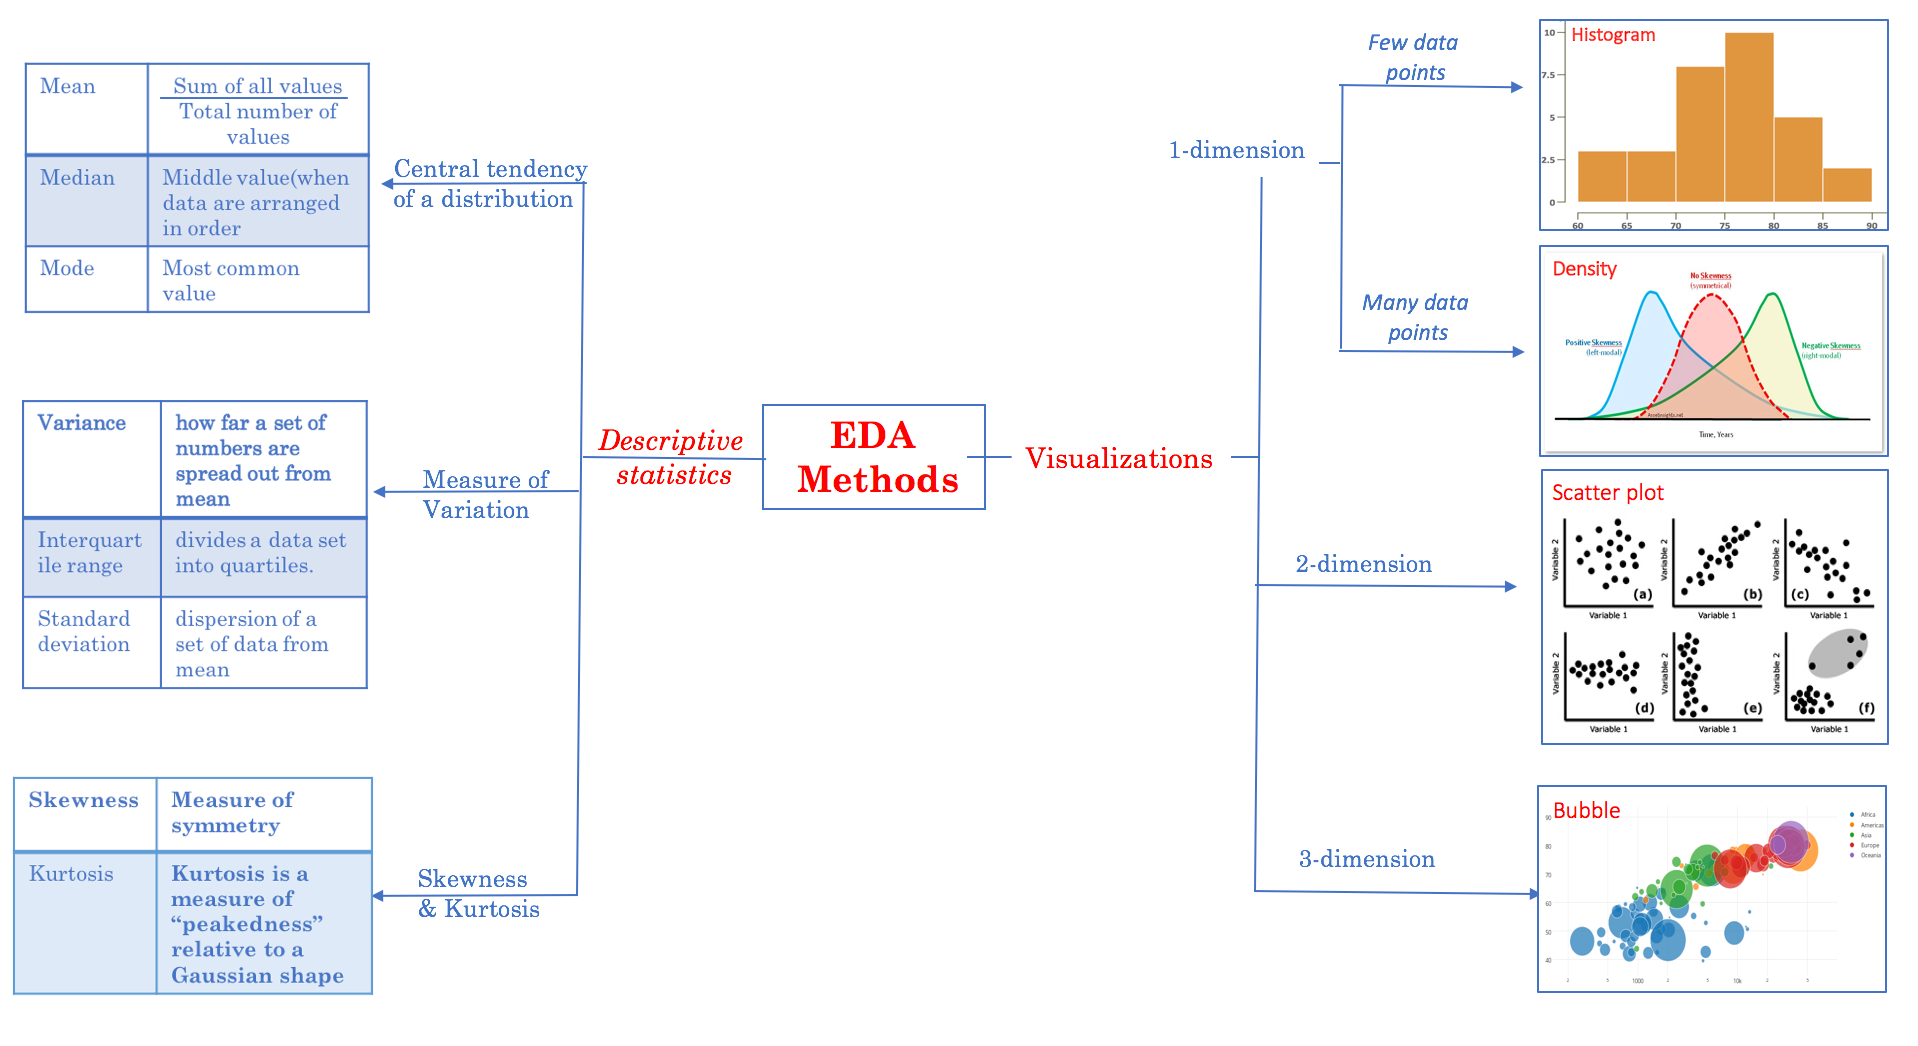

In [1]:
from IPython.display import Image
Image('EDA.png', width=800)

# 1. 迴歸之資料探索與分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 目標變數探索 

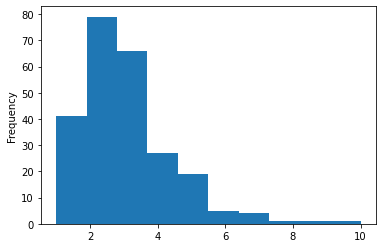

In [4]:
df['tip'].plot.hist( bins = 10)

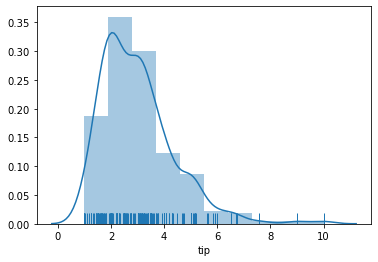

In [5]:
sns.distplot(df ['tip'], bins = 10, rug=True,  kde=True, hist=True)


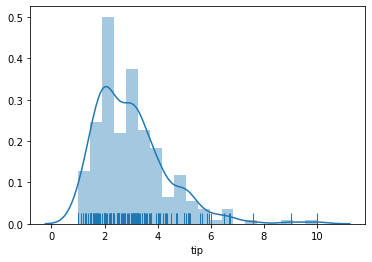

In [6]:
sns.distplot(df ['tip'], bins = 20, rug=True,  kde=True, hist=True)

## 矯正右偏(skew)

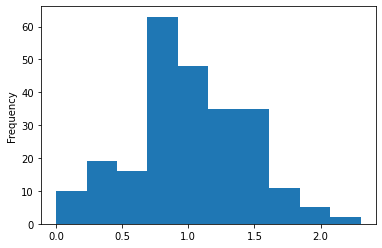

In [7]:
tips = np.log(df['tip'])
tips.plot.hist( bins = 10)

## 其他特徵變數探索

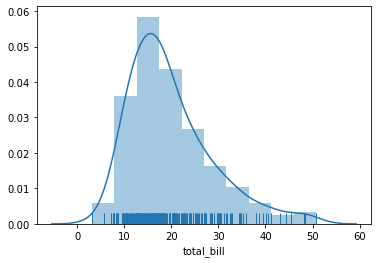

In [8]:
sns.distplot(df['total_bill'], bins = 10, rug=True,  kde=True, hist=True)

## 檢查類別變數是否平衡? 

In [9]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

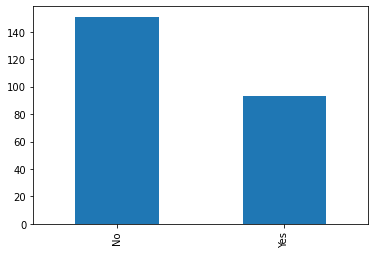

In [10]:
df['smoker'].value_counts().plot(kind='bar')

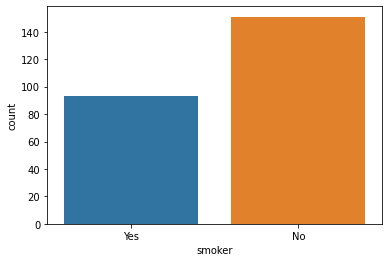

In [11]:
sns.countplot(df['smoker'])

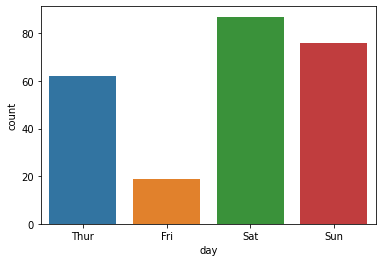

In [12]:
sns.countplot(df['day'])

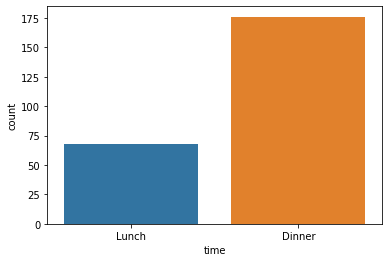

In [13]:
sns.countplot(df['time'])

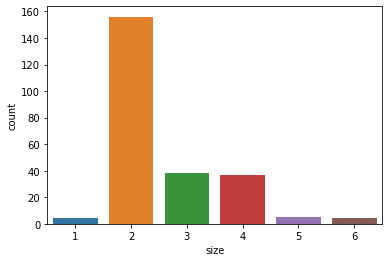

In [14]:
sns.countplot(df['size'])

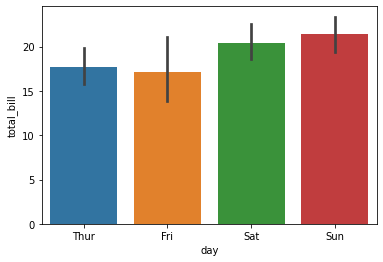

In [16]:
sns.barplot(x="day", y="total_bill", data=df)

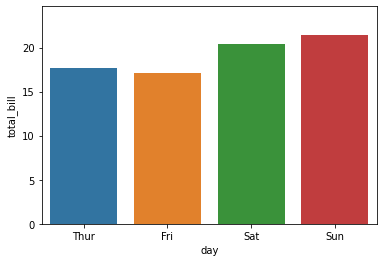

In [17]:
sns.barplot(x="day", y="total_bill", data=df, errwidth=0)

## X與Y的關聯度、X之間的依存度

In [14]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [15]:
df['sex_n'] = df['sex'].map({'Female':0, 'Male':1}).astype(int)
df['smoker_n'] = df['smoker'].map({'No':0, 'Yes':1}).astype(int)
df['day_n'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3}).astype(int)
df['time_n'] = df['time'].map({'Lunch':0, 'Dinner':1}).astype(int)
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_n,smoker_n,day_n,time_n
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,3,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,3,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,3,1


In [16]:
df['day_n'].unique()

array([3, 2, 0, 1])

In [17]:
df.corr()

,total_bill,tip,size,sex_n,smoker_n,day_n,time_n
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,0.173693,0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,0.135499,0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.165350,0.103411
sex_n,0.144877,0.088862,0.086195,1.000000,0.002816,0.230791,0.205231
smoker_n,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.032653,0.054921
day_n,0.173693,0.135499,0.165350,0.230791,-0.032653,1.000000,0.874366
time_n,0.183118,0.121629,0.103411,0.205231,0.054921,0.874366,1.000000


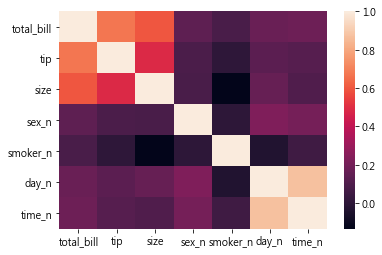

In [18]:
sns.heatmap(df.corr())

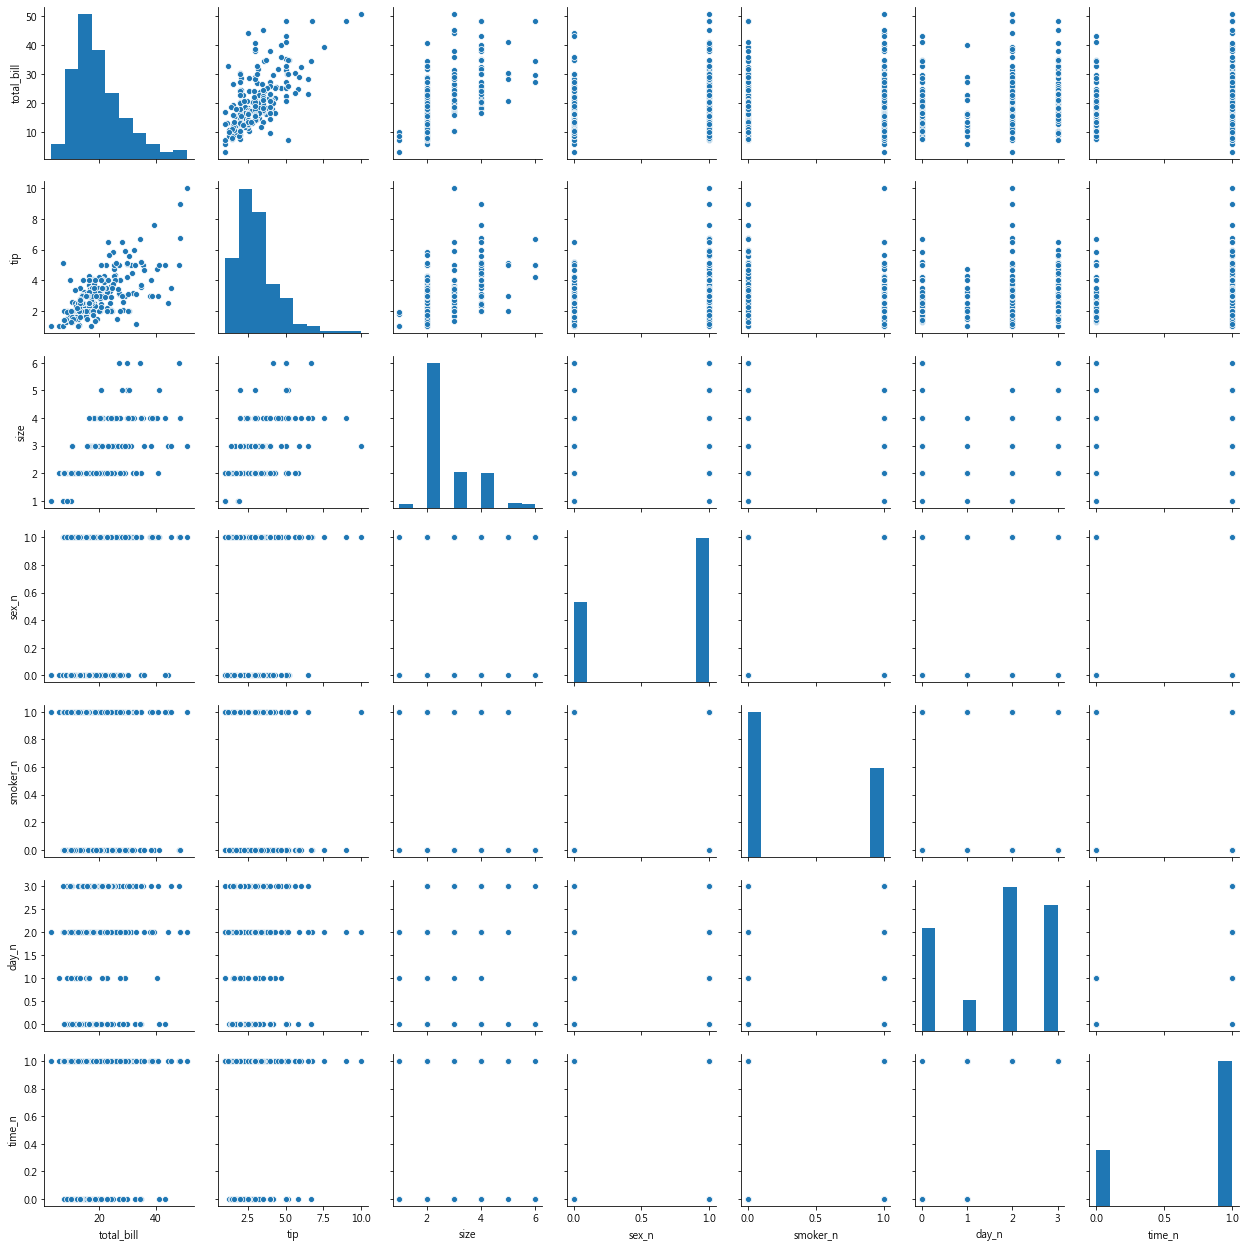

In [19]:
sns.pairplot(df)

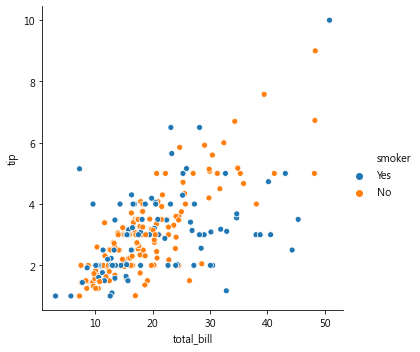

In [20]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df)

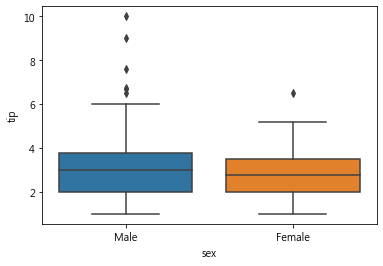

In [58]:
sns.boxplot('sex', 'tip', data=df)

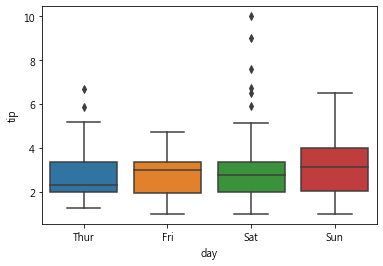

In [60]:
sns.boxplot('day', 'tip', data=df)

In [61]:
df['holiday'] = df['day_n'].map(lambda x: 0 if x==0 else 1)

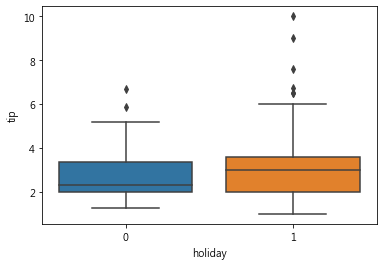

In [62]:
sns.boxplot('holiday', 'tip', data=df)

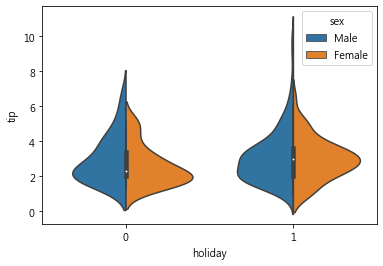

In [65]:
sns.violinplot('holiday', 'tip', hue='sex', data=df, split=True)

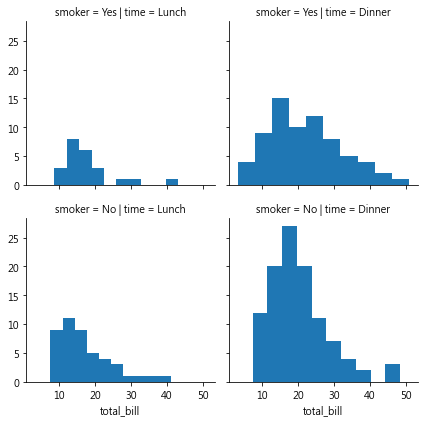

In [71]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

In [83]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


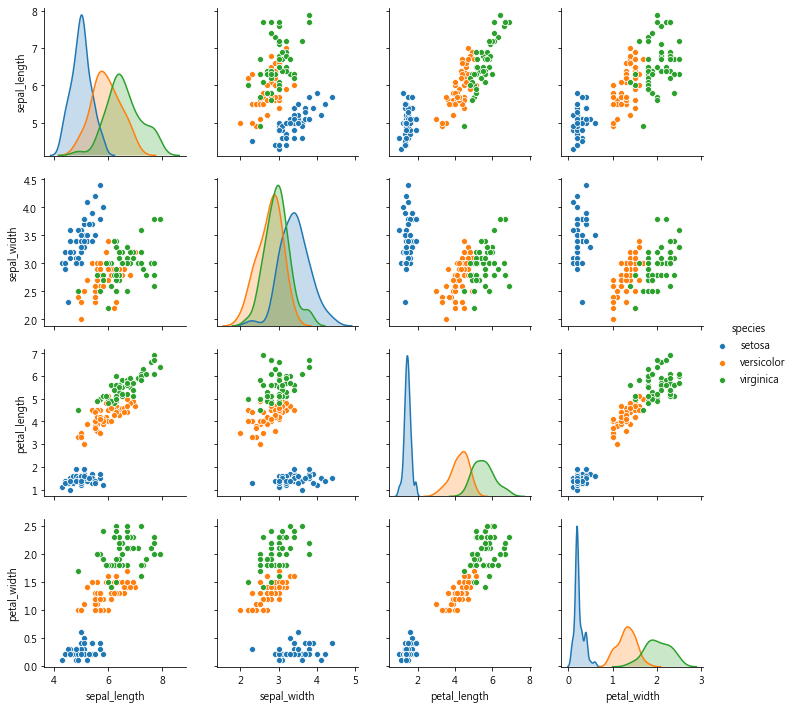

In [82]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

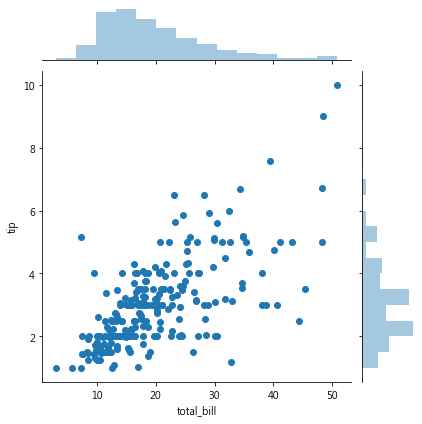

In [72]:
# Scatter plots
sns.jointplot(x="total_bill", y="tip", data=df)

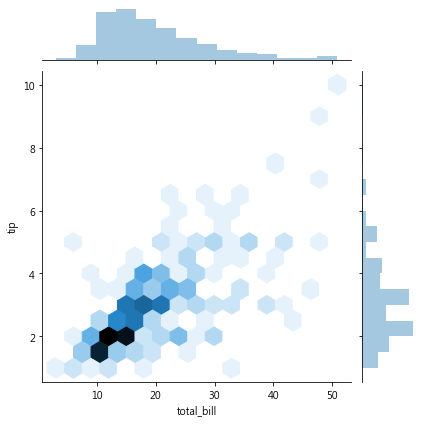

In [75]:
# Hexbin plots
sns.jointplot(x="total_bill", y="tip", data=df, kind="hex")

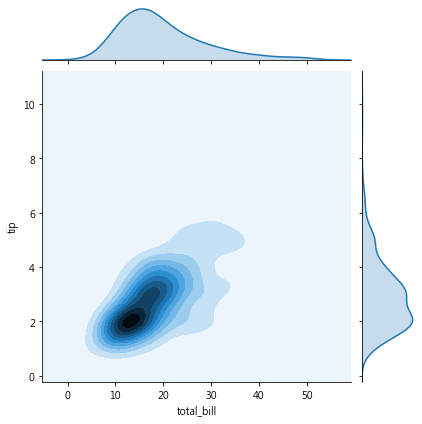

In [76]:
# Kernel density estimation(KDE)
sns.jointplot(x="total_bill", y="tip", data=df, kind="kde")

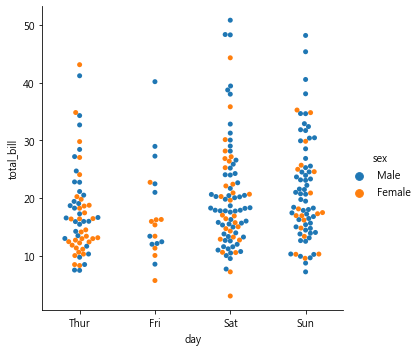

In [22]:
# swarm
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=df)

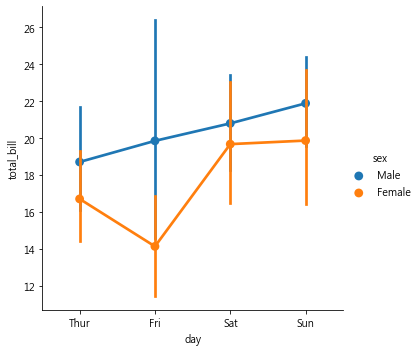

In [24]:
# line chart with std
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=df)